## Bayes Klassifikator selber programmiert 

von Eric Hirsch und Jonas Morsch

### Alle benötigten Bibliotheken werden geladen

In [23]:
import Bayes_class as BC 
import Data_preparation as DP 
DP=DP.Data_preparation()


import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 
import random 

### Den Datansatz laden 

In [12]:
df=DP.load_csv_to_df("ricsData_big_v5.csv")
# Merkamle welche für die Klassifizierung benutzt werden sollen auswählen 
df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7) # Aufteilen der Daten in Trainings und Testdaten 

training set size: 564 samples 
test set size: 241 samples


### Erstellen des Naiven Bayes Modell 

In [6]:
nb=BC.GaussianNaiveBayes() # Intitalisieten des Naiven Bayes Modell 
nb.fit(X_train.values,y_train.values.ravel()) # Trainieren des Netztes 
y_predicted=nb.predict(X_test.values)  # Vorhersagen der Testdaten


### Ausgeben der Metris 

In [13]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.30      0.51      0.38        41
           1       0.72      0.49      0.58       131
           2       0.49      0.59      0.54        69

    accuracy                           0.52       241
   macro avg       0.51      0.53      0.50       241
weighted avg       0.58      0.52      0.54       241



<AxesSubplot:>

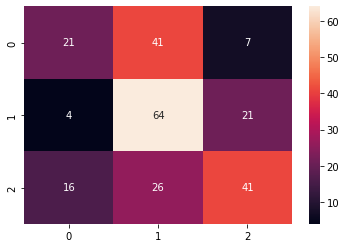

In [14]:
cm =confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)

### Vorhersagen eines einzigen Bildes 


In [25]:
random_index=random.randint(0,len(X_test)) # ein Index im Bereich 0 länge der Testdaten wählen 
y_predict=nb.predict(X_test.values[random_index].reshape(1,-1))  # Vorhersagen der Testdaten
print("Class predictet Naive Bayes: {}".format(y_predict))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))

Class predictet Naive Bayes: [1]
actual Class: Label    1
Name: 460, dtype: int64 
